In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import fundamentalanalysis as fa
from datetime import datetime
import plotly.express as px
from datetime import date, timedelta
import numpy as np

FA_API_KEY = '85fe259a4ec6fad3cbe55a5ddaf7f9b4'

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter, YearLocator
import sqlite3
import pandas as pd

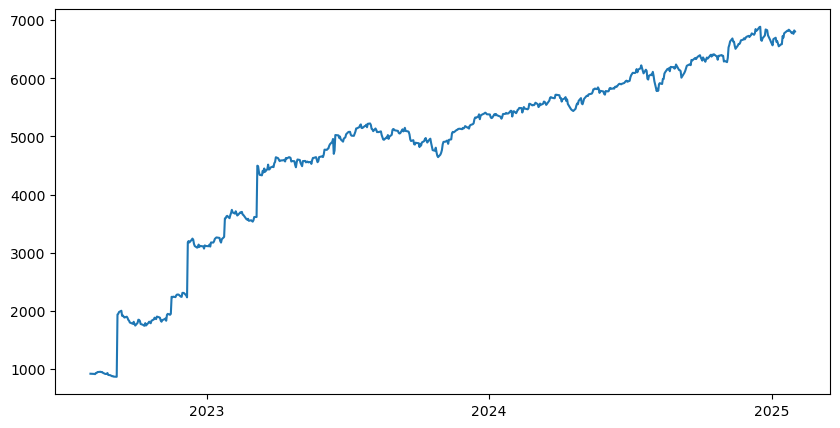

In [39]:
# Need to add cash balance
# Need to initialise DF
# Convert to NZD 
# Read in from database
# Update curretn database holdings

conn = sqlite3.connect("stock_transactions.db")
query = "SELECT * FROM stock_transactions"
df = pd.read_sql_query(query, conn)
conn.close()

# Data cleaning
df['date'] = pd.to_datetime(df['date'])

current_holdings_shares = []
current_holdings = []

data = pd.DataFrame(columns = ['total_portfolio_value', 'cash_balance'])
for i in range(len(df)):
    if df['ticker'][i] not in current_holdings:
        current_holdings.append(df['ticker'][i])
        current_holdings_shares.append(df['units'][i])
        stock = yf.Ticker(df['ticker'][i])
        stock_data = stock.history(start = df['date'][i])
        data[df['ticker'][i]] = stock_data['Close'] * df['units'][i]
    
    else:
        # current_holdings_shares['AAPL'] += update to correct number of shares
        stock = yf.Ticker(df['ticker'][i])
        stock_data = stock.history(start = df['date'][i])
        temp_data = pd.DataFrame()
        if df['action'][i] == 'Buy':
            temp_data[df['ticker'][i]] = stock_data['Close']*df['units'][i]
        else: 
            temp_data[df['ticker'][i]] = stock_data['Close']*df['units'][i]*-1

        # data[df['ticker']] += temp_data[df['ticker'][i]].fillna(0)
        data = pd.merge(data, temp_data, left_index=True, right_index=True, how="outer", suffixes = ('_df1', '_df2'))
        # data = pd.merge(data[df['ticker'][i]], temp_data[df['ticker'][i]], left_index = True, right_index = True, how = 'left', suffixes = ('_df1', '_df2'))
        data.fillna(0, inplace=True)
        data[df['ticker'][i]] = data[df['ticker'][i] + '_df1'] + data[df['ticker'][i] + '_df2']
        data = data.drop(columns = [df['ticker'][i] + '_df1', df['ticker'][i] + '_df2'])
    
data['total_portfolio_value'] = data.sum(axis=1)
fig, ax = plt.subplots(figsize=(10, 5)) # set the figsize parameter to increase the width of the plot
ax.plot(data.index, data['total_portfolio_value'], label='Total Portfolio Value')

# set the x-axis tick locator and formatter to show only the years
years = YearLocator()
year_format = DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(year_format)

plt.show()

In [40]:
data

,total_portfolio_value,cash_balance,VOO,SCHB,VOOV,SCHD,KO,TSLA,GOOGL
Date,,,,,,,,,
2022-08-03 00:00:00-04:00,916.979065,0,916.979065,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2022-08-04 00:00:00-04:00,916.257172,0,916.257172,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2022-08-05 00:00:00-04:00,914.356079,0,914.356079,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2022-08-08 00:00:00-04:00,913.537979,0,913.537979,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2022-08-09 00:00:00-04:00,909.928436,0,909.928436,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,6776.255813,0,3031.764893,492.974960,1333.466375,373.833010,538.424091,583.810491,421.981995
2025-01-28 00:00:00-05:00,6792.362013,0,3057.174866,496.788266,1329.011979,368.839796,525.694805,585.192295,429.660007
2025-01-29 00:00:00-05:00,6765.290051,0,3043.754852,495.093468,1326.854396,368.051403,529.656915,571.977009,429.902008


In [34]:
import sqlite3
import pandas as pd
import yfinance as yf

# Connect to SQLite database
conn = sqlite3.connect("stock_transactions.db")
query = "SELECT * FROM stock_transactions"
df = pd.read_sql_query(query, conn)
conn.close()

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Track current holdings and shares
current_holdings = []
current_holdings_shares = {}  # Dictionary to track shares per ticker
data = pd.DataFrame(columns=['total_portfolio_value', 'cash_balance'])

# Process transactions
for i in range(len(df)):
    ticker = df['ticker'][i]
    units = df['units'][i]
    action = df['action'][i]
    date = df['date'][i]

    # Fetch stock price data
    stock = yf.Ticker(ticker)
    stock_data = stock.history(start=date)['Close']

    # Initialize holding if new
    if ticker not in current_holdings:
        current_holdings.append(ticker)
        current_holdings_shares[ticker] = 0  # Start with 0 shares
        data[ticker] = 0  # Initialize column in DataFrame

    # Update share count based on action
    if action == 'Buy':
        current_holdings_shares[ticker] += units
    elif action == 'Sell':
        current_holdings_shares[ticker] -= units  # Reduce shares

    # Calculate transaction impact
    transaction_value = stock_data * units
    if action == 'Sell':
        transaction_value *= -1  # Negative for sell transactions

    # Update portfolio data **directly** instead of using merge
    if ticker in data:
        data[ticker] = data[ticker] + transaction_value.fillna(0)  # Update column directly
    else:
        data[ticker] = transaction_value.fillna(0)  # Create new column if missing


In [35]:
data

,total_portfolio_value,cash_balance,VOO,SCHB,VOOV,SCHD,TSLA,KO,GOOGL
Date,,,,,,,,,
2022-08-03 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-04 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-05 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-08 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-09 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,NaN,NaN,NaN,492.974960,1333.466375,373.833010,583.810491,538.424091,421.981995
2025-01-28 00:00:00-05:00,NaN,NaN,NaN,496.788266,1329.011979,368.839796,585.192295,525.694805,429.660007
2025-01-29 00:00:00-05:00,NaN,NaN,NaN,495.093468,1326.854396,368.051403,571.977009,529.656915,429.902008


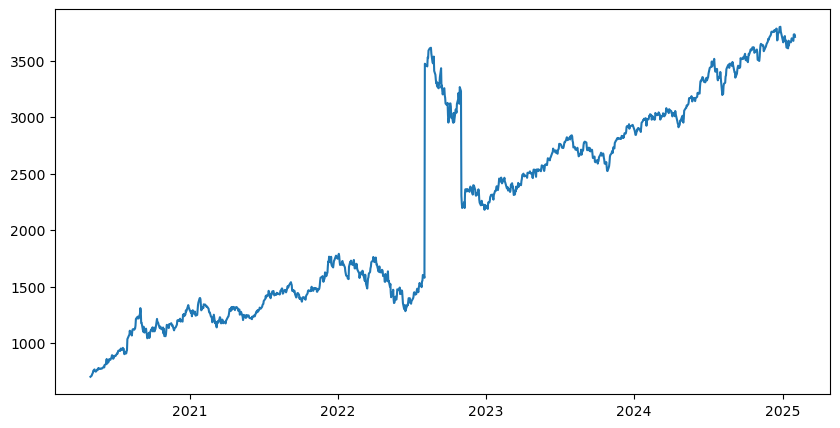

In [7]:
tickers = ["AAPL","AAPL", "VOO"]
shares = [10,-6, 5]
date_purchased = ['2020-05-01','2022-11-01', '2022-08-03']
date_purchased = pd.to_datetime(date_purchased)
current_holdings_shares = []
current_holdings = []

data = pd.DataFrame(columns = ['total_portfolio_value', 'cash_balance'])
for i in range(len(tickers)):
    if tickers[i] not in current_holdings:
        current_holdings.append(tickers[i])
        current_holdings_shares.append(shares[i])
        stock = yf.Ticker(tickers[i])
        stock_data = stock.history(start=date_purchased[i])
        data[tickers[i]] = stock_data['Close'] * shares[i]
    
    else:
        # current_holdings_shares['AAPL'] += update to correct number of shares
        stock = yf.Ticker(tickers[i])
        stock_data = stock.history(start=date_purchased[i])
        temp_data = pd.DataFrame()
        temp_data[tickers[i]] = stock_data['Close']*shares[i]
        data = pd.merge(data[tickers[i]], temp_data[tickers[i]], left_index = True, right_index = True, how = 'left', suffixes = ('_df1', '_df2'))
        data.fillna(0, inplace=True)
        data[tickers[i]] = data[tickers[i] + '_df1'] + data[tickers[i] + '_df2']
        data = data.drop(columns = [tickers[i] + '_df1', tickers[i] + '_df2'])
    
data['total_portfolio_value'] = data.sum(axis=1)
fig, ax = plt.subplots(figsize=(10, 5)) # set the figsize parameter to increase the width of the plot
ax.plot(data.index, data['total_portfolio_value'], label='Total Portfolio Value')

# set the x-axis tick locator and formatter to show only the years
years = YearLocator()
year_format = DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(year_format)

plt.show()

In [5]:
data

,AAPL,VOO,total_portfolio_value
Date,,,
2020-05-01 00:00:00-04:00,702.283707,NaN,702.283707
2020-05-04 00:00:00-04:00,712.220154,NaN,712.220154
2020-05-05 00:00:00-04:00,722.909622,NaN,722.909622
2020-05-06 00:00:00-04:00,730.368118,NaN,730.368118
2020-05-07 00:00:00-04:00,737.923660,NaN,737.923660
...,...,...,...
2025-01-27 00:00:00-05:00,919.440002,2756.149902,3675.589905
2025-01-28 00:00:00-05:00,953.039978,2779.249878,3732.289856
2025-01-29 00:00:00-05:00,957.440002,2767.049866,3724.489868
